# ※ naver Open Api를 사용하여 네이버지식인에서 "전주 여행" 과 "경주 여행" 을 검색 -> 명사만 추출(re) -> 빈도분석(DataFrame), 시각화(워드클라우드)

# 1. 네이버 api를 활용하여 두 검색어 추출

In [56]:
import requests
import pandas as pd
import json
from requests import get
from bs4 import BeautifulSoup
from konlpy.tag import Kkma
import nltk
from nltk.tokenize import RegexpTokenizer 
from PIL import Image
import numpy as np

In [70]:
client_id = "VZFooCV5DlzZFqro7AN8"
client_secret = "n42UfN9IIf"
keywords = ["전주 여행", "경주 여행"]
pages = 10

In [71]:
def get_kin_results(keyword, pages):
    items_list = []
    for page in range(1, pages + 1):
        url = f'https://kin.naver.com/search/list.naver?query={keyword}&page={page}'
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        items = soup.select('ul.basic1 > li dt > a')
        for item in items:
            items_list.append(item.text)
    return items_list

In [72]:
def get_kin_results(keyword, pages):
    items_list = []
    for page in range(1, pages + 1):
        url = f'https://kin.naver.com/search/list.naver?query={keyword}&page={page}'
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        items = soup.select('ul.basic1 > li dt > a')
        for item in items:
            items_list.append(item.text)
    return items_list

In [73]:
def kkma_noun(text_list):
    kkma = Kkma
    nouns = []
    for text in text_list:
        nouns += okt.nouns(text)
    return Counter(nouns)

In [74]:
def create_wordcloud(frequencies, title):
    wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf', 
                           background_color='white', 
                           width=800, 
                           height=400).generate_from_frequencies(frequencies)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

In [104]:
text_data = frequencies
texts_ = ' '.join(text_data)
ret = RegexpTokenizer('[\w]{3,}')
words = ret.tokenize(texts_)

In [105]:
불용어 = set(['전주', '여행', '경주', '여행'])

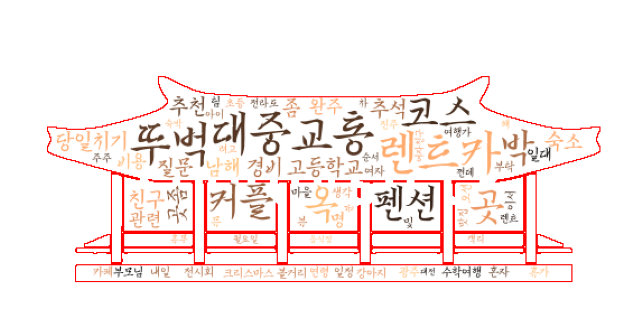

In [106]:
img = Image.open('data/korea-house-black-fill.png')
mask = np.array(img)
mask = np.where(mask > 200, 255, 0).astype(np.uint8)
# plt.imshow(mask)
wordcloud = WordCloud(
    background_color = 'white',
    max_words=400,
    font_path='이순신Regular.ttf',
    relative_scaling=0.2,
    colormap='copper',
    mask=mask,
    contour_color='red',
    contour_width=1,
    stopwords=불용어
)
wordcloud.generate(texts_)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [8]:
from requests import get
import time
import os
import json
from html import unescape
import pandas as pd

In [9]:
# 네이버 API 계정 정보
client_id = "VZFooCV5DlzZFqro7AN8"
client_secret = "n42UfN9IIf"
queries = ['전주 여행', '경주 여행']
max_start = 5

In [11]:
query = '전주 여행'
start = 0
headers = {'X-Naver-Client-Id':client_id,
         'X-Naver-Client-Secret':client_secret}
url= f'https://openapi.naver.com/v1/search/kin.json?query={query}&display=100&start={start+1}'
response = get(url, headers=headers)
print(response.text)

{
	"lastBuildDate":"Tue, 31 Dec 2024 09:47:55 +0900",
	"total":47108,
	"start":1,
	"display":100,
	"items":[
		{
			"title":"<b>전주여행<\/b> 대중교통이랑 렌트카중 어떤게 좋을까요?",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=9&dirId=90110&docId=477694429&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0",
			"description":"... <b>전주여행<\/b>때 움직이기 차가 편할지 대중교통이 편할지 알려주세요. 교통 상황이 어떤지 궁금합니다. <b>전주여행<\/b> 전주맛집 국내여행 전주달봉이 달봉티비 <b>전주여행<\/b>코스 전주가볼만한곳 여수여행 여수가볼만한곳 제주도여행... "
		},
		{
			"title":"<b>전주여행<\/b>갈려고하는데요!",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=9&dirId=90110&docId=472294467&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0",
			"description":"<b>전주여행<\/b>을 갈려고하는데요!아는사람과 갈려고하는데 호텔은 좋은가격에 정했고~ 음..2박3일여행인데 얼마정도갖고가면좋을까요?그리고 맛집같은거 카페같은거 추천해주세요! <b>전주여행<\/b>을 갈려고하는데요!아는사람과 갈려고하는데... "
		},
		{
			"title":"<b>전주 여행<\/b>",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=9&dirId=90110&docId=472340028&qb=7KCE7KO8IO

In [12]:
# 데이터를 저장할 파일 생성 (naver_kin.txt)
file_name = 'data/naver_kin.txt'
with open(file_name, 'w', encoding='utf-8') as file:
    file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format('query', 'no', 'title', 'link', 'description', 'total_text'))

In [13]:
elements = json.loads(response.text)['items']
elements[0]

{'title': '<b>전주여행</b> 대중교통이랑 렌트카중 어떤게 좋을까요?',
 'link': 'https://kin.naver.com/qna/detail.naver?d1id=9&dirId=90110&docId=477694429&qb=7KCE7KO8IOyXrO2WiQ==&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
 'description': '... <b>전주여행</b>때 움직이기 차가 편할지 대중교통이 편할지 알려주세요. 교통 상황이 어떤지 궁금합니다. <b>전주여행</b> 전주맛집 국내여행 전주달봉이 달봉티비 <b>전주여행</b>코스 전주가볼만한곳 여수여행 여수가볼만한곳 제주도여행... '}

In [14]:
for i, element in enumerate(elements):
    title = element['title'].replace('<b>', ' ').replace('</b>', ' ')
    link = element['link']
    description = element['description'].replace('<b>', ' ').replace('</b>', ' ')
    description = unescape(description) # html 특수문자 처리(&lt; -> < 로 대체)
#     print(query, (start*100+i+1), title, link, description, title+' '+description)
    with open(file_name, 'a', encoding='utf-8') as file:
        file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format(query,
                                                     start*100+i+1,
                                                     title,
                                                     link,
                                                     description,
                                                     title + ' ' + description))

In [15]:
df = pd.read_csv('data/naver_kin.txt', sep='\t')
df.head(2)

,query,no,title,link,description,total_text
0,전주 여행,1,전주여행 대중교통이랑 렌트카중 어떤게 좋을까요?,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 전주여행 때 움직이기 차가 편할지 대중교통이 편할지 알려주세요. 교통 상황...,전주여행 대중교통이랑 렌트카중 어떤게 좋을까요? ... 전주여행 때 움직이기 ...
1,전주 여행,2,전주여행 갈려고하는데요!,https://kin.naver.com/qna/detail.naver?d1id=9&...,전주여행 을 갈려고하는데요!아는사람과 갈려고하는데 호텔은 좋은가격에 정했고~ 음....,전주여행 갈려고하는데요! 전주여행 을 갈려고하는데요!아는사람과 갈려고하는데 호텔...


# 12월 31일(2024년 마지막날)

In [1]:
from requests import get
import time
import os
import json
from html import unescape # &lt; -> <, &gt;-> >
import pandas as pd

In [2]:
# 네이버 API 계정 정보
client_id = "VZFooCV5DlzZFqro7AN8"
client_secret = "n42UfN9IIf"
queries = ['전주 여행', '경주 여행']
max_start = 5

In [3]:
def get_search_element_save(query, start):
    headers = {'X-Naver-Client-Id':client_id,
           'X-Naver-Client-Secret':client_secret}
    url = f'https://openapi.naver.com/v1/search/kin.json?query={query}&display=100&start={start+1}'
    response = get(url, headers=headers)
    elements = json.loads(response.text)['items']
    for i, element in enumerate(elements):
        title = element['title'].replace('<b>', ' ').replace('</b>', ' ')
        link = element['link']
        description = element['description'].replace('<b>', ' ').replace('</b>', ' ')
        description = unescape(description) # html 특수문자 처리(&lt; -> <로 대체)
        # print(query, (start*100+i+1), title, link, description, title+' ' +description)
        with open(file_name, 'a', encoding='utf-8') as file:
            file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format(query, 
                                                         start*100+i+1,
                                                         title,
                                                         link,
                                                         description, 
                                                         title + ' ' +description))

In [4]:
# 데이터를 저장할 파일 생성 (naver_kin.txt)하고 title 저장
file_name = 'data/naver_kin.txt'
with open(file_name, 'w', encoding='utf-8') as file:
    file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format('query', 
                            'no','title','link', 'description', 'total_text'))

In [5]:
for query in queries:
    for start in range(max_start):
        print(start, query, '읽는중')
        get_search_element_save(query, start+1)
        time.sleep(0.3)

0 전주 여행 읽는중
1 전주 여행 읽는중
2 전주 여행 읽는중
3 전주 여행 읽는중
4 전주 여행 읽는중
0 경주 여행 읽는중
1 경주 여행 읽는중
2 경주 여행 읽는중
3 경주 여행 읽는중
4 경주 여행 읽는중


# 2. 품사 태깅 저장

In [6]:
df = pd.read_csv('data/naver_kin.txt', sep='\t')
df.sample()

,query,no,title,link,description,total_text
605,경주 여행,206,경주 여행 (내공100),https://kin.naver.com/qna/detail.naver?d1id=9&...,경주 여행 당일치기로 일찍아침에 거고 저녁 늦은시간에... 경주 여행 일정 ...,경주 여행 (내공100) 경주 여행 당일치기로 일찍아침에 거고 저녁 늦은시간에...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   query        1000 non-null   object
 1   no           1000 non-null   int64 
 2   title        1000 non-null   object
 3   link         1000 non-null   object
 4   description  1000 non-null   object
 5   total_text   1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [8]:
# 데이터 프레임 을 for문을 돌릴 경우 컬럼명만 적용
for row in df:
    print(row)

query
no
title
link
description
total_text


In [9]:
# 데이터 프레임 을 for문 적용을 위해 list로 형변환
df_list = df[['query', 'no', 'total_text']].values.tolist()
type(df_list)
print(df_list[::250])

[['전주 여행', 101, ' 전주여행 갈려고하는데요!  전주여행 을 갈려고하는데요!아는사람과 갈려고하는데 호텔은 좋은가격에 정했고~ 음..2박3일여행인데 얼마정도갖고가면좋을까요?그리고 맛집같은거 카페같은거 추천해주세요!  전주여행 을 갈려고하는데요!아는사람과 갈려고하는데... '], ['전주 여행', 351, ' 전주 여행 코스 짜주세요! 많이 급합니다..! 안녕하세요.가족 여행 으로  전주 에 놀러가려는데요. 당장 이번주 금요일에 가는데 어딜갈지 몰라서... 숙소는 라한호텔로 잡았고 한옥마을 쪽을 가고 싶은데 별로 걷지 않으면서 카페투어는 아닌  여행 코스 짜주실 수 있나요? 호캉스로... '], ['경주 여행', 101, ' 경주 여행 을 가는데 갈만한 곳 추천좀  경주 여행 을 가는데 갈만한 곳 추천좀 해주세요  경주 여행  추천지 입니다 경주월드 국립 경주 박물관 황리단길 첨성대 불국사 엑스포 공원 등등 입니다'], ['경주 여행', 351, '2박3일  경주여행  코스 추천이요! ... 요번에는 색다른 주제로  경주 여행 을 하고 싶어요~ 문화재 위주가 아닌 다른 위주로 갈만한 곳 추천해주세요! 야경... 2박3일  경주여행  코스 추천이요!답변드릴게요!안녕하세요 저도 저번주에  경주여행 갔던 사람입니다^^  경주여행 이... ']]


In [21]:
file_name = 'data/naver_kin_pos.csv'
with open(file_name, 'w', encoding='cp949') as file:
    file.write('{},{},{},{}\n'.format('query', 'no', 'token', 'pos'))

In [22]:
from konlpy.tag import Hannanum
from mecab import MeCab
stopwords = ['여행', '전주', '경주']
select_pos = ['N']

In [23]:
import re
text = '음. 경주ㅎㅎ좋아요 ㅎㅎ 진짜 일까? ㅠㅠ'
re.sub('[^가-힣\s]', ' ', text)

'음  경주  좋아요    진짜 일까    '

In [24]:
pos_tagger = Hannanum()
for i, row in enumerate(df_list):
    query = row[0]
    no = row[1]
    text = row[2]
#     print('수정전 :', text)
    text = re.sub('[^가-힣\s]', ' ', text)
    text = re.sub('[\s+]', ' ', text)
#     print('수정후 :', text, end='\n\n')
    text_pos = pos_tagger.pos(text,22)
    if i%250 == 0:
        print(query, no, len(text), text, end='\n\n')
    for token, pos in text_pos:
#         if token not in stopwords and pos in select_pos and len(token) > 1 :
        if token not in stopwords and len(token) > 1 :
            with open(file_name, 'a') as file:
                file.write('{},{},{},{}\n'.format(query, no, token, pos))

전주 여행 101 140  전주여행 갈려고하는데요   전주여행 을 갈려고하는데요 아는사람과 갈려고하는데 호텔은 좋은가격에 정했고  음   박 일여행인데 얼마정도갖고가면좋을까요 그리고 맛집같은거 카페같은거 추천해주세요   전주여행 을 갈려고하는데요 아는사람과 갈려고하는데    

전주 여행 351 160  전주 여행 코스 짜주세요  많이 급합니다    안녕하세요 가족 여행 으로  전주 에 놀러가려는데요  당장 이번주 금요일에 가는데 어딜갈지 몰라서    숙소는 라한호텔로 잡았고 한옥마을 쪽을 가고 싶은데 별로 걷지 않으면서 카페투어는 아닌  여행 코스 짜주실 수 있나요  호캉스로    

경주 여행 101 108  경주 여행 을 가는데 갈만한 곳 추천좀  경주 여행 을 가는데 갈만한 곳 추천좀 해주세요  경주 여행  추천지 입니다 경주월드 국립 경주 박물관 황리단길 첨성대 불국사 엑스포 공원 등등 입니다

경주 여행 351 162  박 일  경주여행  코스 추천이요      요번에는 색다른 주제로  경주 여행 을 하고 싶어요  문화재 위주가 아닌 다른 위주로 갈만한 곳 추천해주세요  야경     박 일  경주여행  코스 추천이요 답변드릴게요 안녕하세요 저도 저번주에  경주여행 갔던 사람입니다    경주여행 이    



# 3. 명사만 추출하여 빈도분석

In [25]:
df = pd.read_csv('data/naver_kin_pos.csv', encoding='cp949')
df.tail(2)

,query,no,token,pos
22354,경주 여행,600,경주여행,NC
22355,경주 여행,600,하시기,NC


In [29]:
# 명사만
df_flt = df.loc[(df['pos']=='NC') | (df['pos']=='NQ'), ['query','token','pos']]
df_flt = df.loc[df['pos'].isin(['NC', 'NQ']),['query','token','pos']]

In [32]:
df_flt.iloc[::1000]

,query,token,pos
0,전주 여행,전주여행,NC
1363,전주 여행,맛집,NC
2736,전주 여행,전시회같은거,NC
4088,전주 여행,생각,NC
5476,전주 여행,전주가볼만한곳,NC
6881,전주 여행,비용,NC
8199,전주 여행,전주한옥마을,NC
9580,전주 여행,전주달봉,NC
10960,전주 여행,유명한,NC
12460,경주 여행,경주여행,NC


In [42]:
# query별 token별 count 수 (빈도수)
# df_flt.groupby(['query','token']).count() 소트 작업이 필요
df_grp = df_flt.groupby('query')['token'].value_counts()
df_grp

query  token       
경주 여행  경주여행            1036
       코스               400
       추천               260
       숙소               152
       질문               109
                       ... 
전주 여행  시외버스터미널            1
       얼마정도갖고가면좋을까요       1
       좋은가격               1
       찜질방                1
       카페같은거              1
Name: token, Length: 1287, dtype: int64

In [43]:
# 위의 df_grp의 index을 컬럼으로 
df_idx = df_grp.reset_index(name='count')
df_idx

,query,token,count
0,경주 여행,경주여행,1036
1,경주 여행,코스,400
2,경주 여행,추천,260
3,경주 여행,숙소,152
4,경주 여행,질문,109
...,...,...,...
1282,전주 여행,시외버스터미널,1
1283,전주 여행,얼마정도갖고가면좋을까요,1
1284,전주 여행,좋은가격,1
1285,전주 여행,찜질방,1


In [53]:
# 전주 여행, 경주 여행 빈도 추출 -> 병합
a = pd.DataFrame([['단어1', 52],
                 ['단어2', 12]], columns=['단어', 'count'])
b = pd.DataFrame([['단어1', 90],
                 ['단어3', 52]], columns=['단어', 'count'])

# display(a)
# display(b)
ab = pd.merge(a, b,
              how='outer', # inner(공통), left(a기준), rigth(b기준)
             on='단어')
ab.fillna(0, inplace=True)
ab.columns = ['단어', '경주빈도', '전주빈도']
ab['경주빈도'] = ab['경주빈도'].astype('int')
import numpy as np
ab['전주빈도'] = ab['전주빈도'].astype(np.int16)
ab

,단어,경주빈도,전주빈도
0,단어1,52,90
1,단어2,12,0
2,단어3,0,52


In [54]:
df_gj = df_idx.loc[df_idx['query']=='경주 여행', ['token', 'count']]
df_jj = df_idx.loc[df_idx['query']=='전주 여행', ['token', 'count']]
df_gj.shape, df_jj.shape

((663, 2), (624, 2))

In [59]:
df_gj.head(10)

,token,count
0,경주여행,1036
1,코스,400
2,추천,260
3,숙소,152
4,질문,109
5,일정,100
6,안녕,88
7,계획,74
8,관련,65
9,답변,65


In [57]:
df_gj.sort_values(by='count', ascending=False).index == df_gj.index

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [88]:
df_mrg = pd.merge(df_gj, df_jj,
                 how='outer',
                 on='token')
df_mrg.columns = ['token', '경주빈도','전주빈도']
df_mrg.fillna(0, inplace=True)
df_mrg['경주빈도'] = df_mrg['경주빈도'].astype('int16')
df_mrg['전주빈도'] = df_mrg['전주빈도'].astype(np.int16)
df_mrg

,token,경주빈도,전주빈도
0,경주여행,1036,0
1,코스,400,420
2,추천,260,238
3,숙소,152,68
4,질문,109,80
...,...,...,...
1103,시외버스터미널,0,1
1104,얼마정도갖고가면좋을까요,0,1
1105,좋은가격,0,1
1106,찜질방,0,1


In [89]:
df_mrg['빈도합'] = df_mrg['경주빈도'] + df_mrg['전주빈도']
df_mrg.sort_values(by='빈도합', ascending=False, inplace=True)

In [90]:
df_mrg['경주비율'] = df_mrg['경주빈도']/df_mrg['빈도합']
df_mrg['전주비율'] = df_mrg['전주빈도']/df_mrg['빈도합']
df_mrg = df_mrg.reset_index(drop=True)
df_mrg.head()

,token,경주빈도,전주빈도,빈도합,경주비율,전주비율
0,경주여행,1036,0,1036,1.000000,0.000000
1,코스,400,420,820,0.487805,0.512195
2,전주여행,0,739,739,0.000000,1.000000
3,추천,260,238,498,0.522088,0.477912
4,숙소,152,68,220,0.690909,0.309091


In [91]:
# 비율 컬럼은 %
def method(x):
    return "{:.2f%}".format(x)
# df_mrg['전주비율'].apply()

In [92]:
df_mrg['경주비율'] = df_mrg['경주비율'].apply(lambda x : "{:.2%}".format(x))
df_mrg['전주비율'] = df_mrg['전주비율'].apply(lambda x : "{:.2%}".format(x))
df_mrg.head()

,token,경주빈도,전주빈도,빈도합,경주비율,전주비율
0,경주여행,1036,0,1036,100.00%,0.00%
1,코스,400,420,820,48.78%,51.22%
2,전주여행,0,739,739,0.00%,100.00%
3,추천,260,238,498,52.21%,47.79%
4,숙소,152,68,220,69.09%,30.91%


In [94]:
df_mrg[df_mrg['token'].isin(['경주 여행','전주 여행'])]

,token,경주빈도,전주빈도,빈도합,경주비율,전주비율


In [96]:
df_mrg.to_csv('data/naver_kin_count.csv', encoding='cp949', index=False)

# 4. 워드 클라우드
- 전주여행 명사만, 경주여행 명사만

In [98]:
df_flt['pos'].unique()

array(['NC'], dtype=object)

In [99]:
df_flt.iloc[::5000]

,query,token,pos
0,전주 여행,전주여행,NC
6881,전주 여행,비용,NC
14023,경주 여행,조회수,NC
21660,경주 여행,황성공원,NC


In [101]:
# 전주 여행 token들, 경주여행 token들 
jj_noun_list = df_flt.loc[df_flt['query']=='전주 여행', 'token'].tolist()
gj_noun_list = df_flt.loc[df_flt['query']=='경주 여행', 'token'].tolist()

['전주여행',
 '전주여행',
 '아는사람',
 '호텔',
 '좋은가격',
 '얼마정도갖고가면좋을까요',
 '맛집같은거',
 '카페같은거',
 '추천',
 '전주여행',
 '아는사람',
 '커플여행',
 '추천',
 '숙소',
 '맛집',
 '추천',
 '감사',
 '한옥마을',
 '답변',
 '도움',
 '한옥마을',
 '전주한옥마을',
 '맛집',
 '추천',
 '뚜벅',
 '코스',
 '남친이랑',
 '뚜벅이에요',
 '숙소',
 '한옥마을',
 '이틀동안',
 '코스',
 '추천',
 '맛집',
 '추천',
 '광고',
 '남친이랑',
 '뚜벅이에요',
 '숙소',
 '한옥마을',
 '펜션',
 '한옥',
 '된곳이요',
 '남자친구',
 '전주여행',
 '가기로해',
 '전주펜션',
 '한옥마을',
 '근처',
 '한옥느낌',
 '전주펜션',
 '내부',
 '정감',
 '분위기',
 '빠른답변',
 '부탁드랴용',
 '커플',
 '도움',
 '드릴게요',
 '남자친구',
 '이용',
 '이용',
 '요소',
 '교통체증',
 '예상',
 '날짜',
 '이용',
 '남자친구',
 '고등학교친구들',
 '전주여행',
 '당일치기',
 '고등학교',
 '친구들',
 '전주여행',
 '당일치기',
 '예정',
 '부모님',
 '허락',
 '고등학교',
 '시절',
 '친구들',
 '소중',
 '추억',
 '코스',
 '추천',
 '뭔가',
 '박물관',
 '관람',
 '자연',
 '경치',
 '구경',
 '산타',
 '별루에',
 '추천',
 '코스',
 '추천해드릴게요',
 '전통음식',
 '문화',
 '풍부',
 '유명한데',
 '숙소',
 '곳좀',
 '남자친구',
 '오랜만',
 '숙소',
 '예약',
 '답변해주세효',
 '안녕',
 '여기어때',
 '질문',
 '숙소',
 '관련',
 '답변',
 '다음',
 '전주여행',
 '경비',
 '전주여행',
 '경비',
 '얼마정도',
 '숙소',
 '전주여행',
 '경비',
 '얼마정도',
 '숙소'

In [102]:
df_grp = df_flt.groupby('query')['token'].apply(list)
df_grp

query
경주 여행    [추천좀, 추천좀, 추천지, 경주월드, 국립, 박물관, 황리단길, 첨성대, 불국사,...
전주 여행    [전주여행, 전주여행, 아는사람, 호텔, 좋은가격, 얼마정도갖고가면좋을까요, 맛집같...
Name: token, dtype: object

In [104]:
jj_noun_list = df_grp['전주 여행']
gj_noun_list = df_grp['경주 여행']
print(jj_noun_list[:10], gj_noun_list[:10])

['전주여행', '전주여행', '아는사람', '호텔', '좋은가격', '얼마정도갖고가면좋을까요', '맛집같은거', '카페같은거', '추천', '전주여행'] ['추천좀', '추천좀', '추천지', '경주월드', '국립', '박물관', '황리단길', '첨성대', '불국사', '엑스포']


In [106]:
gyeongju = ' '.join(gj_noun_list)
jeonju = ' '.join(jj_noun_list)
print(jeonju[:50])

전주여행 전주여행 아는사람 호텔 좋은가격 얼마정도갖고가면좋을까요 맛집같은거 카페같은거 추천


In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [108]:
font_path = 'data/NanumPenScript-Regular.ttf'
color_map = 'Set2'

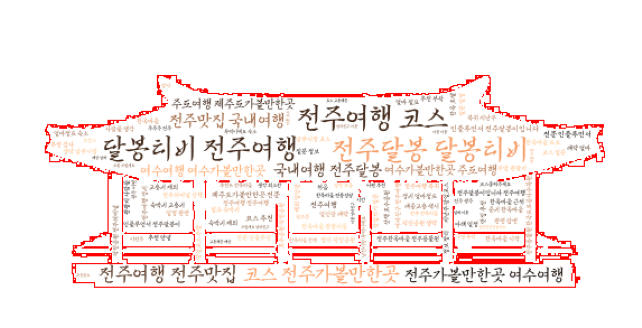

In [125]:
from PIL import Image
img = Image.open('data/korea-house-black-fill.png')
mask = np.array(img)
# mask = np.where(mask > 200, 255, 0).astype(np.uint8)
# plt.imshow(mask)
wordcloud = WordCloud(
    background_color = 'white',
    max_words=400,
    font_path='이순신Regular.ttf',
    relative_scaling=0.1,
    colormap='copper',
    mask=mask,
    contour_color='red',
    contour_width=1,
    stopwords=불용어,
    random_state=4
)
wordcloud.generate(jeonju)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [126]:
# 생성된 wordcloud 이미지 저장
wordcloud.to_file('data/jeonju_cloud.jpg')

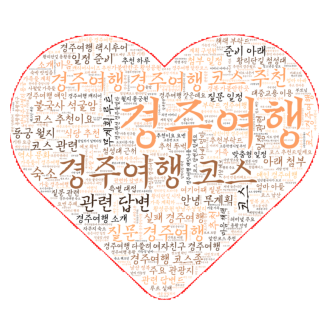

In [131]:
img = Image.open('data/heart.jpg')
mask = np.array(img)
# mask = np.where(mask > 200, 255, 0).astype(np.uint8)
# plt.imshow(mask)
wordcloud = WordCloud(
    background_color = 'white',
    max_words=400,
    font_path='이순신Regular.ttf',
    relative_scaling=0.6,
    colormap='copper',
    mask=mask,
    contour_color='red',
    contour_width=1,
    stopwords=불용어,
    random_state=4
)
wordcloud.generate(gyeongju)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [130]:
# 생성된 wordcloud 이미지 저장
wordcloud.to_file('data/gyeongju_cloud.jpg')